In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Pergunta 1

Abra o ficheiro com a imagem "lena.tif"e apresente a imagem.
Verifique para que servem os métodos "dtype"e "shape":

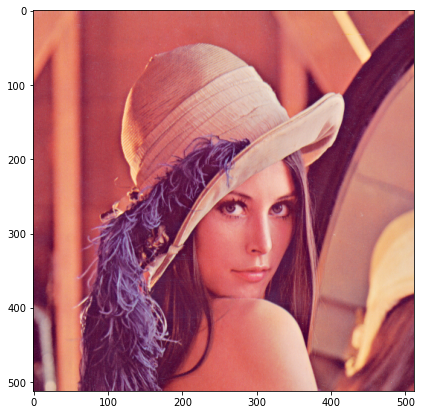

uint8
(512, 512, 3)


In [59]:
#Usando cv2 e matplotlib para abrir a imagem

x_img = cv2.imread('lena.tif')

x_img_rgb = cv2.cvtColor(x_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.imshow(x_img_rgb)
lena = plt.imread('lena.tif')
plt.show()

cv2.imshow('Original Image', x_img)
print(x_img.dtype)
print(x_img.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()

Os métodos "dtype" e "shape" servem para saber o tipo de dados de uma variável e a forma de um array, respetivamente. Neste caso, o tipo de dados é unsigned int 8 e a shape é (512, 512, 3)

# Pergunta 2

Grave a mesma imagem, mas agora em formato "JPEG"com diferentes qualidades.
Verifique visualmente a qualidade das imagens assim como o tamanho do ficheiro.
Produza o código para calcular a taxa de compressão, a SNR e a PSNR.

In [60]:
cv2.imwrite('file1.jpg', x_img,(cv2.IMWRITE_JPEG_QUALITY,80))
cv2.imwrite('file2.jpg', x_img,(cv2.IMWRITE_JPEG_QUALITY,10))

True

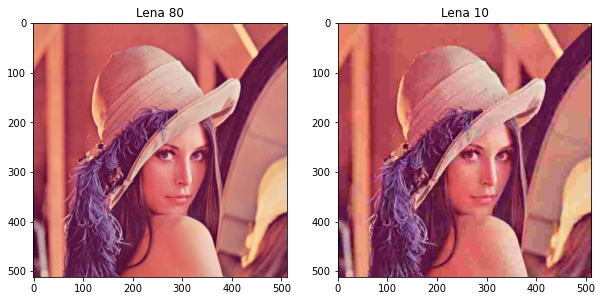

In [61]:
img1 = cv2.imread('file1.jpg')
img2 = cv2.imread('file2.jpg')

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].imshow(img1_rgb)
axes[1].imshow(img2_rgb)

axes[0].set_title('Lena 80')
axes[1].set_title('Lena 10')

plt.show()

cv2.imshow('Lena 80', img1)
cv2.namedWindow('Lena 80', cv2.WINDOW_AUTOSIZE)
cv2.imshow('Lena 10', img2)
cv2.namedWindow('Lena 10', cv2.WINDOW_AUTOSIZE)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
#SNR e PSNR

imagem_OG = x_img
imagem_ruido = img1

# Descomentar se for necessário converter para cinzento

#imagem_OG = cv2.cvtColor(imagem_OG, cv2.COLOR_BGR2GRAY)
#imagem_ruido = cv2.cvtColor(imagem_ruido, cv2.COLOR_BGR2GRAY)

# Calcula média e desvio padrão
mean = np.mean(x_img)
std = np.std(x_img)

# Calculate mean squared error between original and noisy images
mse = np.mean((imagem_OG - imagem_ruido) ** 2)

# Calcula SNR e PSNR
snr = 20 * np.log10(mean / std)
psnr = 20 * np.log10(255.0 / np.sqrt(mse))

print("SNR:", snr)
print("PSNR:", psnr)

SNR: 6.745038961464425
PSNR: 34.52283676479844


In [63]:
#Taxa de compressão

tamanho_OG = os.path.getsize('lena.tif')
tamanho_comp = os.path.getsize('file1.jpg')

compression_rate = float(tamanho_OG) / float(tamanho_comp)

print("Compression rate: " + str(round(compression_rate, 2)) + "%")

Compression rate: 17.83%


# Pergunta 3

Converta a imagem que está na variável x_img para níveis de cinzento, usando o método "cvtColor"e grave o
resultado.
Este método aplica a transformação Y = R ∗ 299/1000 + G ∗ 587/1000 + B ∗ 114/1000, justifique a utilização
desta equação.
Verifique também o tamanho do ficheiro e compare-o com o ficheiro original.

In [64]:
x_img_g = cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
cv2.imshow ('Gray Image', x_img_g)
cv2.imwrite('file3.bmp', x_img_g)
cv2.waitKey(0)
cv2.destroyAllWindows()

Esta equação é essencial pois, para que a imagem mantenha um aspeto apelativo e coerente para o olho humano, usamos a equação para calcular o valor do brilho de cada um dos pixeis e determinar que tipo de valor de cinzento se aproxima do brilho do pixel em expecífico.

# Pergunta 4

Apresente o histograma da imagem (em tons de cinzento) que está na variável x_img_g.
Verifique quantos níveis de cinzento tem a imagem.

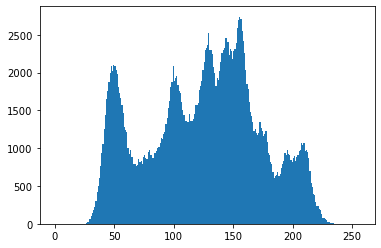

In [65]:
histograma = plt.hist(x_img_g.ravel(),256,[0,256])

In [66]:
print('Nº de tons de cinzento:',len(np.unique(x_img_g[:])))

Nº de tons de cinzento: 215


# Pergunta 5

Nos próximos trabalhos será necessário realizar operações com os valores de cada pixel. Para este efeito podese transformar a imagem para um array. O código seguinte representa o pixel mais significante da imagem.
Apresente oito imagens, cada uma com o valor de cada bit para todos os pixeis.

In [67]:
y = x_img_g > 128
cv2.imshow('BW',y * 1.0)
cv2.waitKey(0)
cv2.destroyAllWindows()

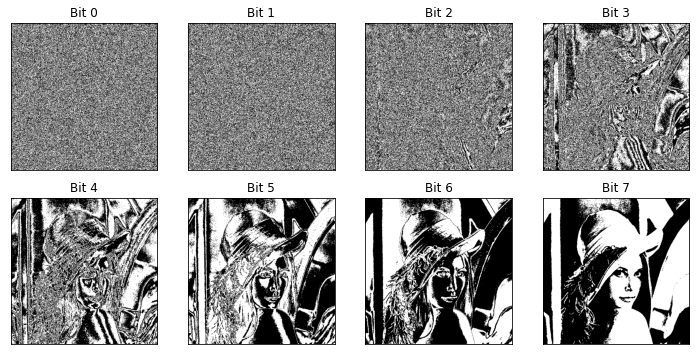

In [68]:
def show_bit_planes(image):
    # Guarda o valor de cada um dos bits
    bit_planes = [np.bitwise_and(image, 2**i) for i in range(8)]

    # Cria uma figura para fazer o display das imagens 
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))
    axs = axs.ravel()

    # Mostra cada imagem com o valor de cada bit para todos os pixeis
    for i, bit_plane in enumerate(bit_planes):
        axs[i].imshow(bit_plane, cmap='gray')
        axs[i].set_title('Bit {}'.format(i))
        axs[i].set_xticks([])
        axs[i].set_yticks([])

    plt.tight_layout()
    plt.show()

show_bit_planes(x_img_g)

# Pergunta 6

 Construa uma função que realize o algoritmo de dithering Floyd Steinberg. Esta função recebe uma matrix (com
os pixeis em tons de cinzento) e devolve uma matrix com valores a preto e branco. Este algoritmo aproxima
cada pixel da imagem (x) ao valor mais próximo (preto ou branco) e o erro é difundido para os pixeis adjacentes
seguindo o método:

In [69]:
def dither(image):

    output = np.array(image, dtype=float)

    height, width = image.shape

    for y in range(height):
        for x in range(width):

            old_pixel = output[y, x]

            new_pixel = 255 if old_pixel >= 128 else 0

            output[y, x] = new_pixel

            error = old_pixel - new_pixel

            if x < width - 1:
                output[y, x+1] += error * 7 / 16
            if y < height - 1 and x > 0:
                output[y+1, x-1] += error * 3 / 16
            if y < height - 1:
                output[y+1, x] += error * 5 / 16
            if y < height - 1 and x < width - 1:
                output[y+1, x+1] += error * 1 / 16


    return output

y = dither(x_img_g)

cv2.imshow ('B&W', y)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Pergunta 7

Construa uma função para gravar a matriz obtida na questão anterior (variável y)para um ficheiro binário.
Verifique o tamanho do ficheiro inicial e do ficheiro final. Calcule a taxa de compressão e meça o SNR e o PSNR

In [70]:
Ib = (y>128).flatten()
Ib.shape

(262144,)

In [72]:
Ib=Ib*1
x = 512**2/8
Ic=Ib.reshape(int(x),8)

In [73]:
#converter para unsigned 8 bit

c=Ic.astype('uint8')
f=open('lena_comp.b','wb')
f.write(c)
f.close()

In [74]:
#SNR e PSNR

mean = np.mean(x_img)
std = np.std(x_img)

mse = np.mean((imagem_OG - imagem_ruido) ** 2)

# Calcula SNR e PSNR
snr = 20 * np.log10(mean / std)
psnr = 20 * np.log10(255.0 / np.sqrt(mse))

print("SNR:", snr)
print("PSNR:", psnr)

print()

#Taxa de compressão

tamanho_OG = os.path.getsize('lena.tif')
tamanho_comp = os.path.getsize('lena_comp.b')

compression_rate = float(tamanho_OG) / float(tamanho_comp)

print("Compression rate: " + str(round(compression_rate, 2)) + "%")

SNR: 6.745038961464425
PSNR: 34.52283676479844

Compression rate: 3.0%


# Pergunta 8

Crie uma função que apresente uma imagem com dimensão de 100 × 100 pixeis como se apresenta na figura. O
ângulo de cada sector é dado por parâmetro passado à função (o ângulo é um valor inteiro entre 0 e 360 graus).

In [75]:
def draw_lines(angle):
    # Cria uma imagem branca 100 x 100
    img = np.ones((100, 100), dtype=np.uint8) * 255

    # Ponto central da imagem
    centro = (50, 50)

    # Calcula número de linhas com base no ângulo
    num_lines = 360 // angle

    # Desenha a primeira linha para servir de guia para as próximas
    cv2.line(img, centro, (100, 50), 0, 1)
    
    # Para fazer uma circunferência, usar circum_border. Para preencher a imagem, usar square_border
    square_border = (100*np.sqrt(2))/2
    circum_border = 50 # Pois distância máxima dos eixos x e y partindo do centro = 50

    # Desenhar linhas baseado no ângulo
    for i in range(1, num_lines):
        
        # Calculate the endpoint of the current line based on the angle
        theta = math.radians(i * angle)
        x = int(centro[0] + square_border * math.cos(theta))
        y = int(centro[1] + square_border * math.sin(theta))
        
        #print('X:', x, ',', 'Y:', y)
        
        # Desenha a linha até ao fim
        cv2.line(img, centro, (x, y), 0, 1)

    cv2.imshow("Linhas", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
draw_lines(45)